<a href="https://colab.research.google.com/github/SolemnShark871/Churn/blob/main/LogReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install pandas-profiling==2.7.1
## General packages
import pandas as pd
import numpy as np
import os
import math
import seaborn as sn
from google.colab import drive
from pandas_profiling import ProfileReport
import matplotlib as mpl
import matplotlib.pyplot as plt

## Machine learning packages
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import metrics
from sklearn.metrics import f1_score, roc_auc_score, silhouette_score, confusion_matrix, recall_score, precision_score
from sklearn.metrics import classification_report, accuracy_score, plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split # Revisar esta librería.
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from IPython.display import Image  
from sklearn.tree import export_graphviz
import graphviz
import pydotplus

## Neural networks packages
import tensorflow as tf
from tensorflow.keras.initializers import HeNormal, HeUniform, GlorotNormal, GlorotUniform
from tensorflow.keras.optimizers import SGD, Adam
from keras import layers, models
from keras.layers import Dense, Dropout
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras.utils.vis_utils import plot_model
from keras.constraints import maxnorm
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

## Validación
from sklearn.pipeline import Pipeline, FeatureUnion

drive.mount('/content/drive', force_remount = True)
os.chdir('/content/drive/MyDrive/Churn') #Thomas & Favio & Juan

os.listdir("./")

Mounted at /content/drive


['personas_retiradas.csv',
 'non_retired_people.csv',
 'retired_people.csv',
 'Datasets_Churn.ipynb',
 'ML models.ipynb',
 'Images',
 'Copy of Spotify challenge.ipynb',
 'not_scaled_not_pca_merged.csv',
 'LogReg.ipynb',
 'pca_merged_scaled.csv',
 'Data_exploration.ipynb',
 'SVM_Model.ipynb',
 'NN model.ipynb']

# ML models

## Logistic regression

### Data inporting

In [ ]:
#Inport the csv with the dataset
df_lambda = pd.read_csv('not_scaled_not_pca_merged.csv', index_col = [0])
df_lambda.head()

,PERSONA,AC_TP,ADM_TP,AI_TP,AP_TP,CO_TP,CU_TP,HD_TP,IN_TP,NE_TP,OP_TP,PD_TP,PM_TP,PR_TP,SE_TP,SM_TP,SO_TP,TD_TP,ASIGNACIONES_FACTURADAS,ASIGNACIONES_NO_FACTURADAS,AC_HR,ADM_HR,AI_HR,AP_HR,CO_HR,CU_HR,HD_HR,IN_HR,NE_HR,OP_HR,PD_HR,PM_HR,PR_HR,SE_HR,SM_HR,SO_HR,TD_HR,.NET,.NET Core,ANGULAR,...,9,28,31,35,41,45,56,59,AC_PN,ADM_PN,AI_PN,AP_PN,CO_PN,HD_PN,IN_PN,NE_PN,OP_PN,PD_PN,PM_PN,SE_PN,SM_PN,SO_PN,TD_PN,ADM_RS,AP_RS,CO_RS,HD_RS,IN_RS,NE_RS,OP_RS,PD_RS,PM_RS,SE_RS,SM_RS,SO_RS,EDAD,GENERO,TIEMPO_EMP,LAMBDA,LABEL
624,1481,0,10,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,4,7,0.0,121.89,0.0,874.1,0.0,0,0.0,0.0,0.0,0.00,0.0,249.0,0.0,0.0,0.00,0.0,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,138,0,0,0,0,0,0,0,0,0,0,0,0,34,0,0,0,0,0,0,0,0,0,0,29,0,7,23.737822,1
515,1316,0,5,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6,0.0,1122.32,0.0,82.0,0.0,0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,414,0,3,0,0,0,0,0,0,0,0,0,0,0,1,26,0,0,0,0,0,0,0,0,0,0,18,1,7,13.335903,1
1168,1692,0,18,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3,0.0,84.50,0.0,0.0,0.0,0,0.0,0.0,0.0,2000.98,0.0,1.0,0.0,0.0,0.00,0.0,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1952,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,0,31,28.338715,0
55,471,0,11,0,0,0,0,0,0,0,10,0,0,0,0,4,0,0,10,12,0.0,244.00,0.0,0.0,0.0,0,0.0,0.0,0.0,1276.68,0.0,0.0,0.0,0.0,647.15,0.0,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,144,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,32,0,47,23.737822,1
1329,2313,0,12,0,4,0,0,0,0,0,0,0,2,0,1,0,0,0,2,6,0.0,55.50,0.0,1238.5,0.0,0,0.0,0.0,0.0,0.00,0.0,112.0,0.0,0.0,0.00,0.0,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1101,0,90,0,0,0,0,0,0,0,0,0,0,0,0,24,0,0,0,0,0,0,0,0,0,0,22,0,9,13.122964,0


In [ ]:
#Creating the training, testing and validation subsets
X = df_lambda.drop(['LABEL', 'PERSONA'], axis = 1)
y = df_lambda['LABEL']

#80% Train, 20% Test, 20% Validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234, stratify = y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 1234, stratify = y_train)

In [ ]:
X_train.value_counts()

AC_TP  ADM_TP  AI_TP  AP_TP  CO_TP  CU_TP  HD_TP  IN_TP  NE_TP  OP_TP  PD_TP  PM_TP  PR_TP  SE_TP  SM_TP  SO_TP  TD_TP  ASIGNACIONES_FACTURADAS  ASIGNACIONES_NO_FACTURADAS  AC_HR  ADM_HR   AI_HR  AP_HR   CO_HR  CU_HR  HD_HR  IN_HR  NE_HR  OP_HR    PD_HR  PM_HR  PR_HR  SE_HR  SM_HR    SO_HR    TD_HR  .NET  .NET Core  ANGULAR  AWS  Activemq  Android / Java  Angular  Azure  Azure DevOps  BOOTSTRAP  BUSINESS OBJECTS  C#  C++  CLOUDERA  Cloudera  Cobol  DAX  Drupal  ECLIPSE  EXCEL  FLUTTER  FORMS  FORMS 3.0  GIT  Ionic / Angular  JBPM  JEE  Java  Java JSF  Java Spring  Boot  Javascript  Jboss Fuse-ESB  KOTLIN  MICROSOFT PROJECT  Microsoft Azure  MySQL  NODE JS  NO_APLICA  Next.Js  ODI  ODV  ORACLE  ORACLE 11  ORACLE 8I  ORACLE 9I  ORACLE DB  Oracle Forms  PL/SQL  Power Builder  PowerBI  Python  React  React Native  SAS  SPRING BOOT  SQL  SQL DEVELOPER  SQL SERVER  TABLEAU  WEBLOGIC  iOS / Objetive C  ACTCOM  ADMB  ADMBD  ADMON  ADMSER  ADMSO  ANAID  ANAJU  ANAPC  ANASPLA  ANCAPA  ANCON  ANC

In [ ]:
y_train.describe()

count    963.000000
mean       0.643821
std        0.479118
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: LABEL, dtype: float64

### Model building

In [ ]:
#Logistic regression parameters to tune
grid_param = {"penalty": ["l1", "l2", "elasticnet", "none"],
              "C": [0.1, 1, 10, 100],
              "solver": ["newton-cg", "lbfgs", "liblinear"], #"saga", "sag"],
              "max_iter": [500]
              }

log_reg = LogisticRegression()
search_grid = GridSearchCV(estimator = log_reg, param_grid = grid_param, n_jobs = -1, cv = 5, 
                           verbose = 3, return_train_score = True, scoring = "accuracy")

In [ ]:
search_results = search_grid.fit(X_train.values, y_train.values)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solv

In [ ]:
#Grid search results
search_results.best_params_

{'C': 0.1, 'max_iter': 500, 'penalty': 'l1', 'solver': 'liblinear'}

In [ ]:
#Build the model with the best parameters
lr = LogisticRegression(C = 0.1, penalty = 'l1', solver = 'liblinear', max_iter = 500, verbose = 3, n_jobs = -1)
lr.fit(X_train.values, y_train.values)

[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


LogisticRegression(C=0.1, max_iter=500, n_jobs=-1, penalty='l1',
                   solver='liblinear', verbose=3)

### Graphs

In [ ]:
#Get the accuracy score for the performance
lr_score = lr.score(X_test.values, y_test.values)
print(f'Accuracy: {round(lr_score*100, 2)}%')

Accuracy: 86.09%


In [ ]:
#Predict with the test set
index = np.random.randint(0, y_test.shape)
y_output = y_test.values[index]
prediction = lr.predict(X_test.values[index])
print('Expected output: ', 'Non retired' if y_output == 0 else 'Retired',
      '\nPredicted output: ', 'Non retired' if prediction == 0 else 'Retired',
      '\nIndex: ', index)

Expected output:  Retired 
Predicted output:  Retired 
Index:  [181]


In [ ]:
labels = [0, 1]
y_predict = lr.predict(X_test.values)
report = classification_report(y_test.values, y_predict, zero_division = 0, output_dict = True, labels = labels)
df_report = pd.DataFrame.from_dict(report, orient = 'columns').T
df_report.rename(index = {'0': 'non retired', '1': 'retired'}, inplace = True)
cmap = sn.color_palette('mako', as_cmap = True)
df_image = df_report.style.background_gradient(cmap = cmap)
df_image
#dfi.export(df_image, RESULTS_PATH + 'classification_report.png')
#df_report[['precision', 'recall', 'f1-score']].style.applymap(lambda v: 'background: green' if (v > 0.5) else '')

,precision,recall,f1-score,support
non retired,0.817308,0.787037,0.801887,108.000000
retired,0.883838,0.902062,0.892857,194.000000
accuracy,0.860927,0.860927,0.860927,0.860927
macro avg,0.850573,0.844549,0.847372,302.000000
weighted avg,0.860046,0.860927,0.860325,302.000000


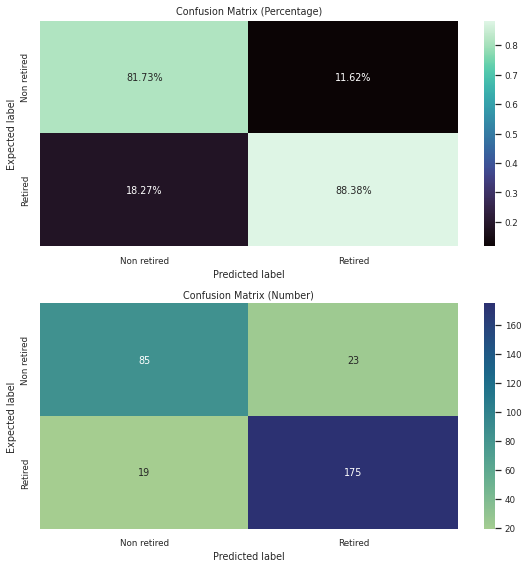

In [ ]:
# Confusion matrix plot
#y_predict = np.zeros(y_predicted.shape[0])
#for i in range(y_predicted.shape[0]):
#    y_predict[i] = y_predicted[i,:].argmax() 
    
y_expect = y_test.values
labels = [0, 1]
str_labels = ['Non retired', 'Retired']
cm = confusion_matrix(y_expect, y_predict, labels = labels)
df_cm = pd.DataFrame(cm, index = str_labels, columns = str_labels)

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(2, 1, 1)
ax.set_title('Confusion Matrix (Percentage)')
sn.set(font_scale = 0.8)
percentage = df_cm/df_cm.sum()
ax = sn.heatmap(percentage.replace(np.nan, 0), annot = True, fmt = '.2%', cmap = 'mako')
ax.set_xlabel('Predicted label')
ax.set_ylabel('Expected label')

ax = fig.add_subplot(2, 1, 2)
ax.set_title('Confusion Matrix (Number)')
ax = sn.heatmap(df_cm, annot = True, fmt = 'd', cmap = 'crest')
ax.set_xlabel('Predicted label')
ax.set_ylabel('Expected label')
fig.tight_layout()
plt.show()

#ax.figure.savefig(RESULTS_PATH + 'confusionMatrix1.png')
#disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
#disp.plot()

### Results

### Metrics

### End

## Logistic regression

### Data inporting

In [9]:
#Inport the csv with the dataset
df_lambda = pd.read_csv('pca_merged_scaled.csv', index_col = [0])
df_lambda.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,LAMBDA,LABEL
643,-0.012914,-0.000624,0.002716,-0.006315,0.003908,0.001826,0.004136,-0.002478,-0.004217,-0.001587,0.004379,-0.002271,0.001394,0.000686,0.001134,0.001527,-0.000562,-0.001267,0.000019,-0.007108,-0.001033,-0.002460,-0.004552,-0.002840,-0.000628,-0.002375,0.000086,-0.001501,-0.000645,-0.002191,0.007064,-0.001658,0.000774,0.004206,0.003016,0.004982,0.003472,-0.003934,0.006553,-0.001804,...,0.003248,-0.006797,0.014357,-0.003288,-0.003430,-0.008984,-0.009917,0.002426,0.000598,0.004289,-0.002648,-0.002146,-0.001157,-0.007084,0.003625,0.001947,-0.005483,-0.009724,-0.000504,0.014057,-0.012090,-0.001354,0.002911,0.006457,0.001989,0.004190,0.003194,0.001035,0.002304,-0.001881,0.002870,-0.011580,0.002363,-0.000029,0.009491,0.006421,0.012853,-0.003783,-0.248733,1
418,-0.012398,-0.001501,0.005389,-0.003728,0.005402,0.001744,0.000684,0.002610,-0.001762,0.001587,0.000338,0.000238,0.002997,-0.004371,0.000526,-0.002169,0.000179,-0.000465,0.001108,-0.005724,0.003085,-0.004225,-0.003379,-0.003061,-0.002822,0.001433,-0.001031,0.001527,-0.001183,0.001236,0.009431,-0.000615,-0.000725,0.005094,-0.001494,0.006415,0.002002,-0.002322,0.003132,-0.003038,...,-0.006379,0.003862,0.006754,-0.004087,-0.001477,-0.006619,0.006821,-0.003882,-0.001203,-0.008963,0.005917,-0.001766,-0.007953,0.001349,0.003938,-0.007753,0.005836,-0.002569,0.004906,0.006122,0.002875,-0.004580,-0.011406,0.007307,-0.009882,-0.001271,0.006460,-0.004177,-0.002913,0.006393,-0.003424,-0.003035,-0.008541,-0.008236,-0.014250,-0.004688,0.002098,-0.001181,-1.045758,1
558,0.000522,0.002168,-0.012190,0.006482,-0.001947,-0.007577,-0.006836,0.004002,0.004902,-0.001824,-0.005806,0.003951,-0.002156,-0.017562,-0.010136,-0.007828,-0.001924,-0.002034,-0.000218,0.009230,-0.008374,0.000777,0.007442,0.000185,0.010888,0.002410,0.001054,-0.012099,0.001806,0.004676,0.007440,-0.014774,-0.000441,0.010066,0.009160,0.005225,0.003762,-0.006703,-0.001976,-0.002395,...,0.004911,0.010966,-0.002093,0.005097,0.007466,0.007516,0.009846,0.007770,-0.013074,0.014815,-0.012023,-0.010737,-0.006359,0.006120,-0.004131,0.002188,-0.034588,-0.006156,0.023148,0.010127,0.013786,0.021372,-0.010541,0.004614,-0.010972,0.017556,-0.002368,0.029494,0.002037,0.007334,0.010962,-0.021081,0.012549,0.000022,-0.000204,0.002748,0.014298,0.013941,-1.045758,1
1474,-0.011249,-0.001203,0.005202,-0.003744,0.004520,0.002133,-0.000460,0.002521,-0.001005,0.001370,0.000191,0.000215,0.004279,-0.005123,0.000269,-0.003415,-0.000090,-0.000179,0.000823,-0.005553,0.001505,-0.002039,-0.004324,-0.002919,-0.004622,0.003473,0.000771,0.002423,-0.000045,-0.000760,0.003919,0.001139,-0.000353,0.001806,-0.003548,0.002523,0.000443,-0.000956,-0.002013,-0.000483,...,-0.006244,-0.000160,0.012871,-0.011404,0.001219,-0.003675,0.006551,-0.003054,0.000071,-0.000815,0.004242,-0.000765,-0.009351,-0.002717,-0.005084,0.002978,-0.002674,-0.005537,0.002365,-0.007604,0.002374,0.001341,0.000647,0.003472,0.003140,0.000835,0.004554,0.001033,-0.000508,-0.006476,0.006536,-0.001346,0.002155,0.000604,-0.014189,0.001082,0.001091,0.005026,1.510269,0
1500,-0.012188,-0.001384,0.005175,-0.003988,0.004806,0.002418,0.000967,0.001882,-0.001834,0.001155,0.001061,-0.000543,0.003253,-0.003671,0.000890,-0.002113,-0.000040,0.000688,0.000600,-0.006530,0.002113,-0.003278,-0.003574,-0.002766,-0.003822,0.002057,-0.000192,0.002435,-0.001308,-0.000120,0.007460,0.000412,-0.000505,0.003227,-0.002694,0.005882,0.000964,-0.001846,0.000681,-0.002467,...,-0.006356,0.001627,0.005671,-0.005602,0.000499,-0.007508,0.006254,-0.000881,-0.002049,-0.003921,0.005398,-0.002810,-0.006753,-0.001362,-0.000121,0.001445,0.002145,-0.002686,0.004007,0.001653,0.006323,0.003697,-0.008420,0.001700,-0.003271,-0.001784,0.006808,-0.003920,-0.004043,0.001939,0.0

In [10]:
#Creating the training, testing and validation subsets
X = df_lambda.drop(['LABEL'], axis = 1)
y = df_lambda['LABEL']

#80% Train, 20% Test, 20% Validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234, stratify = y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 1234, stratify = y_train)

In [11]:
X_train.value_counts()

0          1          2          3          4          5          6          7          8          9          10         11         12         13         14         15         16         17         18         19         20         21         22         23         24         25         26         27         28         29         30         31         32         33         34         35         36         37         38         39         40         41         42         43         44         45         46         47         48         49         50         51         52         53         54         55         56         57         58         59         60         61         62         63         64         65         66         67         68         69         70         71         72         73         74         75         76         77         78         79         80         81         82         83         84         85         86         87         88         89         90        

In [5]:
y_train.describe()

count    963.000000
mean       0.643821
std        0.479118
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: LABEL, dtype: float64

### Model building

In [12]:
#Logistic regression parameters to tune
grid_param = {"penalty": ["l1", "l2", "elasticnet", "none"],
              "C": [0.1, 1, 10, 100],
              "solver": ["newton-cg", "lbfgs", "liblinear"], #"saga", "sag"],
              "max_iter": [500]
              }

log_reg = LogisticRegression()
search_grid = GridSearchCV(estimator = log_reg, param_grid = grid_param, n_jobs = -1, cv = 5, 
                           verbose = 3, return_train_score = True, scoring = "accuracy")

In [13]:
search_results = search_grid.fit(X_train.values, y_train.values)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solv

In [14]:
#Grid search results
search_results.best_params_

{'C': 10, 'max_iter': 500, 'penalty': 'l1', 'solver': 'liblinear'}

In [15]:
#Build the model with the best parameters
lr = LogisticRegression(C = 10, penalty = 'l1', solver = 'liblinear', max_iter = 500, verbose = 3, n_jobs = -1)
lr.fit(X_train.values, y_train.values)

[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


LogisticRegression(C=10, max_iter=500, n_jobs=-1, penalty='l1',
                   solver='liblinear', verbose=3)

### Graphs

In [16]:
#Get the accuracy score for the performance
lr_score = lr.score(X_test.values, y_test.values)
print(f'Accuracy: {round(lr_score*100, 2)}%')

Accuracy: 87.75%


In [17]:
#Predict with the test set
index = np.random.randint(0, y_test.shape)
y_output = y_test.values[index]
prediction = lr.predict(X_test.values[index])
print('Expected output: ', 'Non retired' if y_output == 0 else 'Retired',
      '\nPredicted output: ', 'Non retired' if prediction == 0 else 'Retired',
      '\nIndex: ', index)

Expected output:  Retired 
Predicted output:  Retired 
Index:  [172]


In [18]:
labels = [0, 1]
y_predict = lr.predict(X_test.values)
report = classification_report(y_test.values, y_predict, zero_division = 0, output_dict = True, labels = labels)
df_report = pd.DataFrame.from_dict(report, orient = 'columns').T
df_report.rename(index = {'0': 'non retired', '1': 'retired'}, inplace = True)
cmap = sn.color_palette('mako', as_cmap = True)
df_image = df_report.style.background_gradient(cmap = cmap)
df_image
#dfi.export(df_image, RESULTS_PATH + 'classification_report.png')
#df_report[['precision', 'recall', 'f1-score']].style.applymap(lambda v: 'background: green' if (v > 0.5) else '')

,precision,recall,f1-score,support
non retired,0.917647,0.722222,0.808290,108.000000
retired,0.861751,0.963918,0.909976,194.000000
accuracy,0.877483,0.877483,0.877483,0.877483
macro avg,0.889699,0.843070,0.859133,302.000000
weighted avg,0.881740,0.877483,0.873611,302.000000


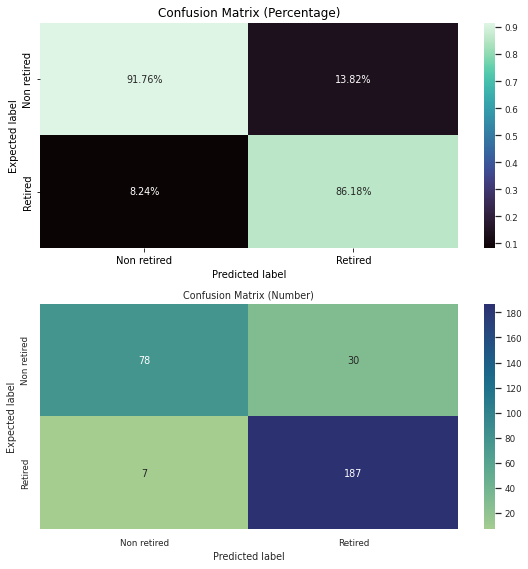

In [19]:
# Confusion matrix plot
#y_predict = np.zeros(y_predicted.shape[0])
#for i in range(y_predicted.shape[0]):
#    y_predict[i] = y_predicted[i,:].argmax() 
    
y_expect = y_test.values
labels = [0, 1]
str_labels = ['Non retired', 'Retired']
cm = confusion_matrix(y_expect, y_predict, labels = labels)
df_cm = pd.DataFrame(cm, index = str_labels, columns = str_labels)

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(2, 1, 1)
ax.set_title('Confusion Matrix (Percentage)')
sn.set(font_scale = 0.8)
percentage = df_cm/df_cm.sum()
ax = sn.heatmap(percentage.replace(np.nan, 0), annot = True, fmt = '.2%', cmap = 'mako')
ax.set_xlabel('Predicted label')
ax.set_ylabel('Expected label')

ax = fig.add_subplot(2, 1, 2)
ax.set_title('Confusion Matrix (Number)')
ax = sn.heatmap(df_cm, annot = True, fmt = 'd', cmap = 'crest')
ax.set_xlabel('Predicted label')
ax.set_ylabel('Expected label')
fig.tight_layout()
plt.show()

#ax.figure.savefig(RESULTS_PATH + 'confusionMatrix1.png')
#disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
#disp.plot()

### Results

### Metrics

### End